# 14장 회귀

> 회귀를 다룹니다.
- author: "Chansung Park"
- toc: true
- comments: true
- permalink: /chapter14/
- badges: true

In [1]:
#hide

!pip install tpot==0.9.5
!pip install dtreeviz==0.8.2
!pip install xgbfir
!pip install yellowbrick==0.9
!pip install lime
!pip install treeinterpreter
!pip install pdpbox
!pip install shap==0.25.2
!pip install scikit-plot==0.3.7
!pip install scikit-learn==0.21.0
!pip install pandas==0.23.4

     |████████████████████████████████| 901kB 4.7MB/s 
     |████████████████████████████████| 163kB 34.7MB/s 
  Created wheel for tpot: filename=TPOT-0.9.5-cp37-none-any.whl size=70870 sha256=1f1d7a3eaca3b9ec0543d5e6df7855ea1e7fb71e716855f5d6bc0612d6ff0501
  Stored in directory: /root/.cache/pip/wheels/97/86/27/698a1366f854d2344fd0f7ee9ef57c8044ec02f182c8a0431e
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=c91a72cd5725a7918e1ecfd7625c93e8a637773045f80055cf2a5f51dcb57eec
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot stopit
  Created wheel for dtreeviz: filename=dtreeviz-0.8.2-cp37-none-any.whl size=24505 sha256=fd7a06f04fedc1212aa35a44a0673667d5c0435afccfa5aef6e0ef8794a5dd6f
  Stored in directory: /root/.cache/pip/wheels/a2/da/b1/3178bb2b10647b5a6340c1979987e3b0c3b993cb674b0a3dcc
Successfully built dtreeviz
     |████████████████████████████████| 153kB 5.9MB/s 
 

     |████████████████████████████████| 276kB 4.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=cdaac1d5a1cc9ae3babee301d046ba14812315042d0906236e2944243360ab37
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
     |████████████████████████████████| 57.7MB 101kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp37-none-any.whl size=57690722 sha256=cecaa045503572f9a387f6490dad53e7389b859993ec1e1f4e1c7ac643df3748
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 204kB 4.2MB/s 
  Created wheel for shap: filename=shap-0.25.2-cp37-cp37m-linux_x86_64.whl size=267712 sha256=e9841f6da6d340abf8ef299b2489b440a94f0a7ce91966d5cde76db4a3a8cc42
  Stored in directory: /root/.cache/pip/wheels/3f/cb/58/2482f534eb1c1f9ac93653887aee5b6ea83718ef041c1310bd


In [1]:
#hide

import warnings
warnings.filterwarnings('ignore')

# 데이터 준비

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import (
  model_selection,
  preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
  b.data, columns=b.feature_names
)
bos_y = b.target

bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
  bos_X,
  bos_y,
  test_size=0.3,
  random_state=42,
)

bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
  bos_sX,
  bos_y,
  test_size=0.3,
  random_state=42,
)

# 14.1 베이스라인 모델

In [3]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

# 14.2 선형 회귀

In [4]:
from sklearn.linear_model import (
  LinearRegression,
)
lr = LinearRegression()
lr.fit(bos_X_train, bos_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
lr.score(bos_X_test, bos_y_test)

0.7112260057484974

In [6]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [7]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484923

In [9]:
lr2.intercept_

22.50945471291039

In [10]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

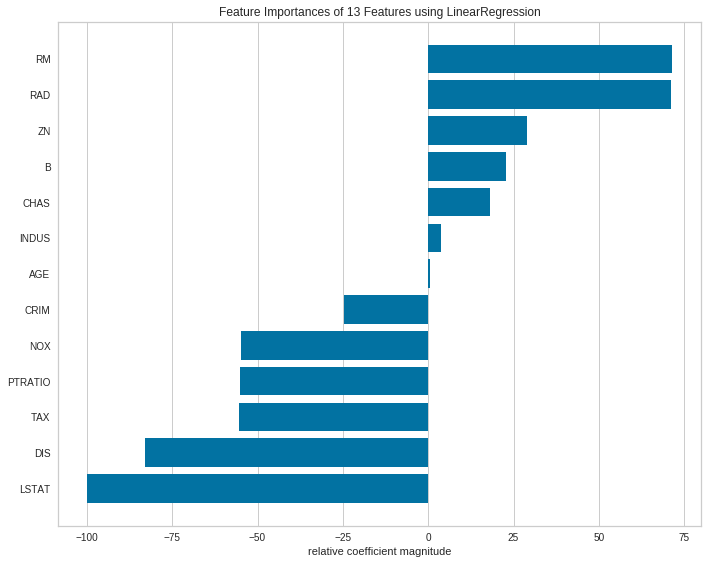

In [12]:
import matplotlib.pyplot as plt
from yellowbrick.features import (
  FeatureImportances,
)

fig, ax = plt.subplots(figsize=(10, 8))

fi_viz = FeatureImportances(
  lr2, labels=bos_X.columns
)

fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()

# 14.3 SVM

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(bos_sX_train, bos_sy_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
svr.score(bos_sX_test, bos_sy_test)

0.6553772022206867

# 14.4 K-최근접 이웃

In [15]:
from sklearn.neighbors import (
  KNeighborsRegressor,
)

knr = KNeighborsRegressor()
knr.fit(bos_sX_train, bos_sy_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [16]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592417

# 14.5 디시전 트리

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(bos_X_train, bos_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [18]:
dtr.score(bos_X_test, bos_y_test)

0.8559207694719114

In [20]:
import pydotplus
from IPython.display import Image

from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
  dtr,
  out_file=dot_data,
  feature_names=bos_X.columns,
  filled=True,
)

g = pydotplus.graph_from_dot_data(
  dot_data.getvalue()
)

Image(g.create_png())

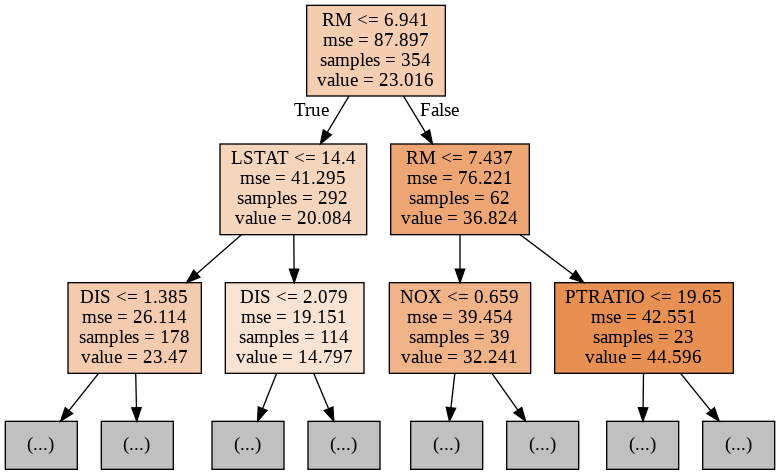

In [21]:
from IPython.display import Image

dot_data = StringIO()
export_graphviz(
  dtr,
  max_depth=2,
  out_file=dot_data,
  feature_names=bos_X.columns,
  filled=True,
)

g = pydotplus.graph_from_dot_data(
  dot_data.getvalue()
)

Image(g.create_png())

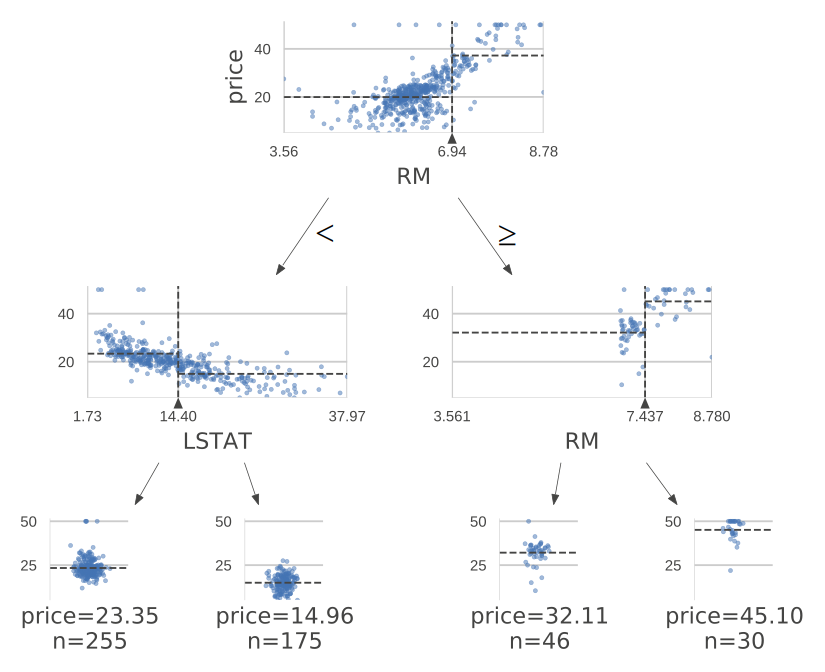

In [30]:
from dtreeviz.trees import dtreeviz

dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(bos_X_train, bos_y_train)

viz = dtreeviz(
  dtr3,
  bos_X,
  bos_y,
  target_name="price",
  feature_names=bos_X.columns,
  scale=(2.5)
)

viz

In [31]:
for col, val in sorted(zip(bos_X.columns, dtr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True)[:5]:
  print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.192
DIS            0.111
CRIM           0.035
NOX            0.029


# 14.6 랜덤 포레스트

In [32]:
from sklearn.ensemble import (
  RandomForestRegressor,
)

rfr = RandomForestRegressor(
  random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [33]:
rfr.score(bos_X_test, bos_y_test)

0.8721182042634867

In [34]:
for col, val in sorted(zip(bos_X.columns, rfr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True)[:5]:
  print(f"{col:10}{val:10.3f}")

RM             0.439
LSTAT          0.380
DIS            0.067
CRIM           0.032
PTRATIO        0.020


# 14.7 XGBoost 회귀

In [36]:
import xgboost as xgb

xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(bos_X_train, bos_y_train)

[14:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
xgr.score(bos_X_test, bos_y_test)

0.871679473122472

In [38]:
xgr.predict(bos_X.iloc[[0]])

array([27.013563], dtype=float32)

In [39]:
for col, val in sorted(zip(bos_X.columns, xgr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True)[:5]:
  print(f"{col:10}{val:10.3f}")

LSTAT          0.485
RM             0.263
PTRATIO        0.060
NOX            0.051
DIS            0.032


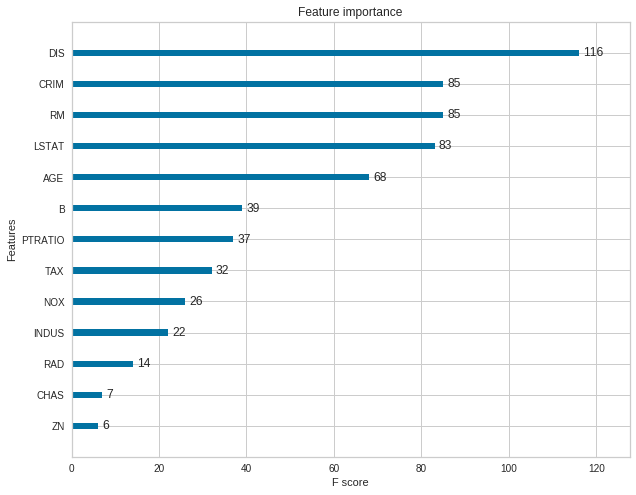

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(xgr, ax=ax)

[14:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


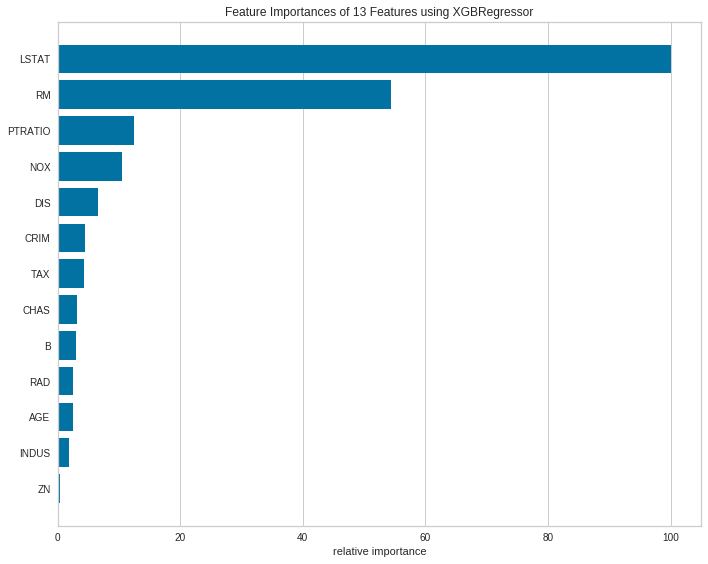

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(bos_X_train, bos_y_train)
fi_viz.poof()

In [43]:
booster = xgr.get_booster()
print(booster.get_dump()[0])

0:[LSTAT<7.86499977] yes=1,no=2,missing=1
	1:[RM<7.43700027] yes=3,no=4,missing=3
		3:[RM<6.65649986] yes=7,no=8,missing=7
			7:leaf=2.42512202
			8:leaf=3.10899997
		4:[CRIM<2.74223518] yes=9,no=10,missing=9
			9:leaf=4.31652212
			10:leaf=1.07000005
	2:[LSTAT<16.0849991] yes=5,no=6,missing=5
		5:[B<47.7250023] yes=11,no=12,missing=11
			11:leaf=0.86499995
			12:leaf=2.11871624
		6:[DIS<1.94000006] yes=13,no=14,missing=13
			13:leaf=1.06833339
			14:leaf=1.57500005



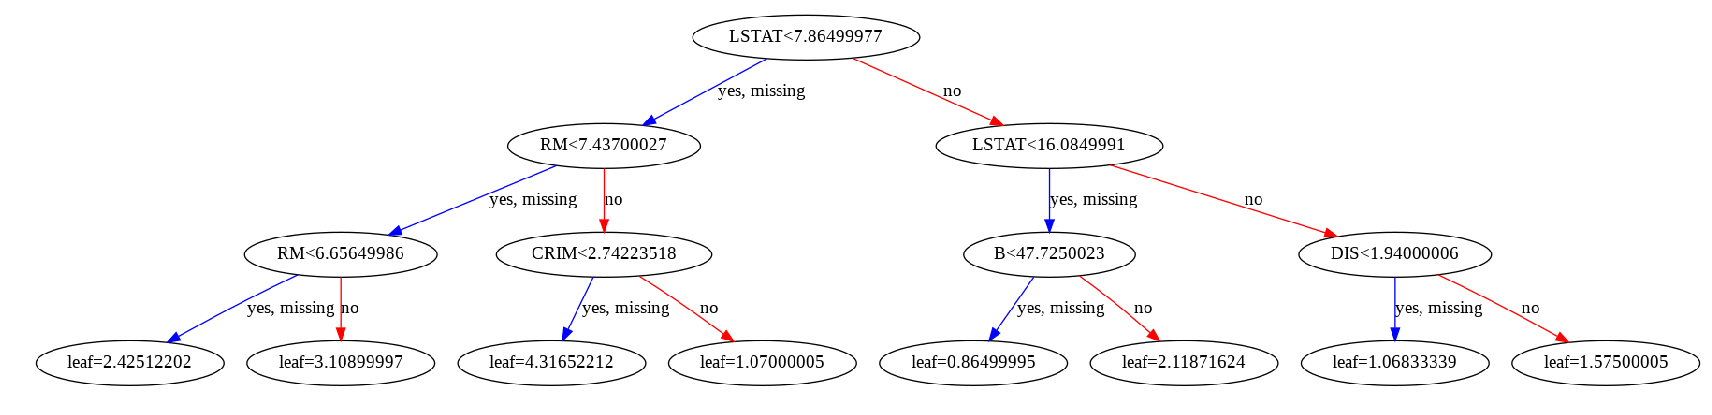

In [46]:
fig, ax = plt.subplots(figsize=(30, 20))
xgb.plot_tree(xgr, ax=ax, num_trees=0)

# 14.8 LightGBM 회귀 분석

In [47]:
import lightgbm as lgb

lgr = lgb.LGBMRegressor(random_state=42)
lgr.fit(bos_X_train, bos_y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
lgr.score(bos_X_test, bos_y_test)

0.847729219534575

In [49]:
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

In [50]:
for col, val in sorted(zip(bos_X.columns, lgr.feature_importances_),
                       key=lambda x: x[1],
                       reverse=True)[:5]:
  print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


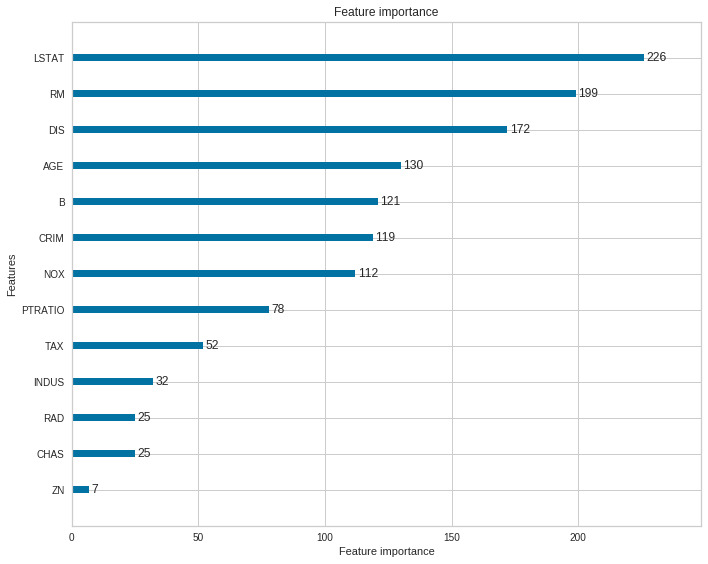

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
lgb.plot_importance(lgr, ax=ax)
fig.tight_layout()